In [79]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

In [80]:
df = pd.read_csv("dataFromAllBooks.csv")
df.head()

,point 1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17
0,1,5,2,4,3,6,2,3,4,5,2,7,2,3,6,3,3
1,7,3,5,2,3,5,2,2,5,3,5,7,9,1,3,5,7
2,9,2,3,5,5,3,6,2,3,4,2,3,6,2,3,4,3
3,2,2,5,7,2,3,4,3,6,2,3,4,2,2,7,2,3
4,6,2,3,7,9,1,2,3,5,2,2,5,3,5,7,9,7


## Apply KMeans to generate clusters as new column

In [81]:
clusters = 3
kmeans = KMeans(n_clusters = clusters)
y_predicted = kmeans.fit_predict(df)
print(kmeans.labels_)
print(kmeans.inertia_)

[0 1 1 0 2 1 1 1 0]
332.40000000000003


In [104]:
df["cluster"] = y_predicted
pd.set_option('display.max_rows', None)
df
# df.head()

,point 1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17,cluster
0,1,5,2,4,3,6,2,3,4,5,2,7,2,3,6,3,3,0
1,7,3,5,2,3,5,2,2,5,3,5,7,9,1,3,5,7,1
2,9,2,3,5,5,3,6,2,3,4,2,3,6,2,3,4,3,1
3,2,2,5,7,2,3,4,3,6,2,3,4,2,2,7,2,3,0
4,6,2,3,7,9,1,2,3,5,2,2,5,3,5,7,9,7,2
5,4,3,6,3,6,2,5,5,3,6,2,3,4,2,3,6,5,1
6,5,2,3,5,2,2,5,3,6,2,3,4,2,2,3,5,2,1
7,7,2,2,7,2,3,7,9,1,2,3,7,2,2,2,7,2,1
8,2,3,5,7,9,7,3,6,2,5,5,3,5,7,6,3,2,0


In [93]:
k_range = range(1,9)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[549.7777777777777,
 424.83333333333326,
 336.0,
 255.66666666666669,
 162.66666666666669,
 102.0,
 56.5,
 23.0]

## Elbow method to determine best K value

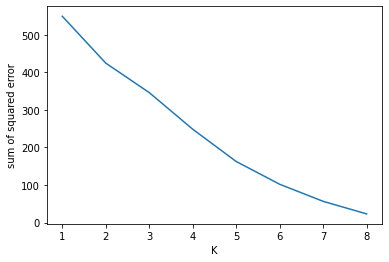

In [84]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_range,sse)

In [94]:

def transform(df):
    df = df.T
    df.reset_index(drop=True, inplace=True)
    return df


# ax = df0.plot()
# # ax.xaxis.set_major_formatter(mtick.PercentFormatter())


# # TO DO: should actually only plot graphs in the same cluster 
# # or, maybe there's a way to plot all graphs in a cluster into the same color

# for i in range(1,clusters):
#     df1 = df[df.cluster.isin([i])]
#     df1 = transform(df1)
#     df1.plot(ax=ax)
# ax


In [95]:
def plot_a_cluster(df,cluster_num):
    data = transform(df)
    datalist =  data.values.tolist()
    firstrow_data = datalist[0]
    numrows_data = len(datalist)
    perc = np.linspace(0,100,len(firstrow_data))

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(perc, firstrow_data)

    if numrows_data>1:
        for i in range(1,numrows_data):
            nextrow_data = datalist[i]
            ax.plot(perc,nextrow_data)


    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)


    fig.suptitle("graph of cluster %i"%cluster_num, fontsize = 20)
    plt.xlabel('percentage of document', fontsize=12)
    plt.ylabel('sentiment score', fontsize=12)

for i in range(clusters):
    df_i = df[df.cluster.isin([i])]
    df_i = transform(df_i)
    plot_a_cluster(df_i,i)


,point 1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17,cluster
0,1,5,2,4,3,6,2,3,4,5,2,7,2,3,6,3,3,0
3,2,2,5,7,2,3,4,3,6,2,3,4,2,2,7,2,3,0
8,2,3,5,7,9,7,3,6,2,5,5,3,5,7,6,3,2,0
